In [1]:
# import modelling packages required for the simulation
from matplotlib import pyplot as plt, animation, colors
from random import random
import time
from numba import jit, prange
import numpy as np

In [2]:
# collecting details for the forest initialization and fire spread

BURNING_TREE = 2 # number representing an area with a burning tree
EMPTY_GROUND = 0 # number representing an empty ground
NORMAL_TREE = 1 # number representing an area with tree that has no fire

probTree = 0.8 # probability that there was initially a tree in the area
probLightning = 0.001 # probability that lightning strikes the area
probBurning = 0.01 # probability that there is a tree burning in the area
probImmune = 0.3 # probability that there is a tree immune to the burning fire in the area

Non-Parallel Modelling of the Spread of Forest Fires

In [3]:
def InitForest(rows, cols):
    # initializing the forest with trees, fire, boundary and empty ground,
    
    forest = np.zeros((rows, cols))
    
    for i in range(rows):
        for j in range(cols):
            
            # randomly choosing whether there is a tree or not
            # if the random number is less than the probability of a tree, then there is a tree
            if random() < probTree:
                # if the random number is less than the probability the tree is burning then there is a burning tree
                if random() < probBurning:
                    forest[i][j] = BURNING_TREE
                else:
                    forest[i][j] = NORMAL_TREE
            # else it just an empty ground
            else:
                forest[i][j] = EMPTY_GROUND
                
    return forest

In [4]:
def ExtendSiteBoundary(forest):
    # using periodic boundary conditions
    # extend the site boundary by add one temporary rows to the top and buttom boundaries.
    # and 2 columns to the left and right boundaries
    
    # adding the top boundary to the buttom boundary and vice versa
    RowStack = np.row_stack((forest[-1,:], forest, forest[0,:]))
    
    # adding the left boundary to the right boundary and the right boundary to the left boundary    
    ColumnStack = np.column_stack((RowStack[:,-1], RowStack, RowStack[:,0]))    
    
    # return the expanded forest
    return ColumnStack

In [5]:
# converting the von Neumann neighborhood into Moore neighborhood as specified in the assignment
def SpreadTheFireUsingMoore(forest, rows, cols):
    # spreading the fire in the forest
    for i in range(1, rows + 1):
        for j in range(1, cols + 1):
            if forest[i][j] == EMPTY_GROUND:
                # if the area is empty ground, then there would be no fire
                forest[i][j] = EMPTY_GROUND
                
            # if there is a tree in the area, fire can spread to the area
            elif forest[i][j] == NORMAL_TREE:             
                    
                # if a neighbouring area is burning, then the tree burns, we'll check the 8 neighbouring areas
                # north, south, east, west, north-east, north-west, south-east, south-west
                if (forest[i - 1][j] == BURNING_TREE or forest[i + 1][j] == BURNING_TREE or 
                    forest[i][j - 1] == BURNING_TREE or forest[i][j + 1] == BURNING_TREE or 
                    forest[i - 1][j - 1] == BURNING_TREE or forest[i - 1][j + 1] == BURNING_TREE or 
                    forest[i + 1][j - 1] == BURNING_TREE or forest[i + 1][j + 1] == BURNING_TREE):
                    
                    # the tree will not burn it's immune to fire
                    if random() < probImmune:
                        forest[i][j] = NORMAL_TREE
                    # otherwise the it will burn
                    else:
                        forest[i][j] = BURNING_TREE
                    
                # if lightning strikes, then the tree burns
                elif random() < probLightning:
                    # the tree will not burn it's immune to fire
                    if random() < probImmune:
                        forest[i][j] = NORMAL_TREE
                    # otherwise the it will burn
                    else:
                        forest[i][j] = BURNING_TREE
                    
                # otherwise, the tree remains a normal tree
                else:
                    forest[i][j] = NORMAL_TREE
            
            # if it's a burning tree, then the tree burns to the ground
            elif forest[i][j] == BURNING_TREE:
                forest[i][j] = EMPTY_GROUND
            else:
                forest[i][j] = EMPTY_GROUND
                    
    return forest

Time elapsed:  0.06250357627868652


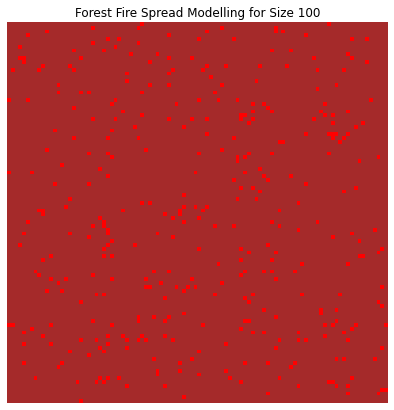

In [6]:
# meausing time for one complete itereation, involving forest initialization, 
# extension of boundaries and spread of fire 
TimeAtStart = time.time()

# generate the initial forest grid
site_size = 100
forestGrid = InitForest(site_size, site_size)
extendedSite = ExtendSiteBoundary(forestGrid)
extendedSite = SpreadTheFireUsingMoore(extendedSite, site_size, site_size)
tempForest = extendedSite[1:site_size + 1, 1:site_size + 1]

timeElapsed = time.time() - TimeAtStart
print("Time elapsed: ", timeElapsed)

# initialize the plot for the forest
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.set_axis_off()
forestSite = ax.imshow(forestGrid, cmap=colors.ListedColormap(['brown', 'green', 'red', 'orange']))
ax.set_title('Forest Fire Spread Modelling for Size {0}'.format(site_size))

# The animation function produces new frames after each itereation.
def animate(i):
    forestSite.set_array(animate.SiteGrid)
    
    # extend the boundaries of the forest
    extendedSite = ExtendSiteBoundary(animate.SiteGrid)
    
    # apply the fire spread rules
    extendedSite = SpreadTheFireUsingMoore(extendedSite, site_size, site_size)
    
    # remove the temporary cells at the border
    animate.SiteGrid = extendedSite[1:site_size + 1, 1:site_size + 1]
    
# adding the forest grid to the animate function namespace.
animate.SiteGrid = forestGrid

# display the forest fire images
anim = animation.FuncAnimation(fig, animate, interval=200, frames=50)
anim.save('{0}_site.gif'.format(site_size))

plt.show()

Time elapsed:  0.9179961681365967


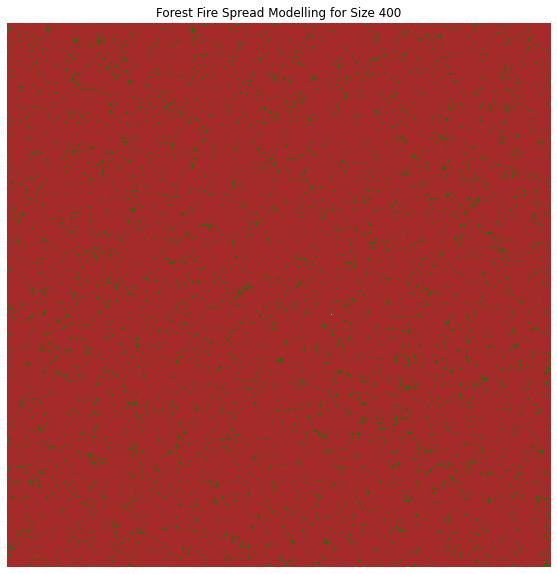

In [7]:
# meausing time for one complete itereation, involving forest initialization, 
# extension of boundaries and spread of fire 
TimeAtStart = time.time()

# generate the initial forest grid
site_size = 400
forestGrid = InitForest(site_size, site_size)
extendedSite = ExtendSiteBoundary(forestGrid)
extendedSite = SpreadTheFireUsingMoore(extendedSite, site_size, site_size)
tempForest = extendedSite[1:site_size + 1, 1:site_size + 1]

timeElapsed = time.time() - TimeAtStart
print("Time elapsed: ", timeElapsed)

# initialize the plot for the forest
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_axis_off()
forestSite = ax.imshow(forestGrid, cmap=colors.ListedColormap(['brown', 'green', 'red', 'orange']))
ax.set_title('Forest Fire Spread Modelling for Size {0}'.format(site_size))

# The animation function produces new frames after each itereation.
def animate(i):
    forestSite.set_array(animate.SiteGrid)
    
    # extend the boundaries of the forest
    extendedSite = ExtendSiteBoundary(animate.SiteGrid)
    
    # apply the fire spread rules
    extendedSite = SpreadTheFireUsingMoore(extendedSite, site_size, site_size)
    
    # remove the temporary cells at the border
    animate.SiteGrid = extendedSite[1:site_size + 1, 1:site_size + 1]
    
# adding the forest grid to the animate function namespace.
animate.SiteGrid = forestGrid

# display the forest fire images
anim = animation.FuncAnimation(fig, animate, interval=200, frames=50)
anim.save('{0}_site.gif'.format(site_size))

plt.show()

Time elapsed:  4.581282377243042


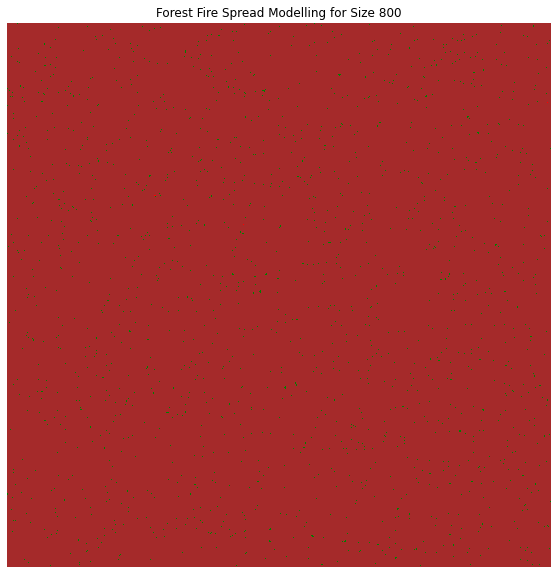

In [8]:
# meausing time for one complete itereation, involving forest initialization, 
# extension of boundaries and spread of fire 
TimeAtStart = time.time()

# generate the initial forest grid
site_size = 800
forestGrid = InitForest(site_size, site_size)
extendedSite = ExtendSiteBoundary(forestGrid)
extendedSite = SpreadTheFireUsingMoore(extendedSite, site_size, site_size)
tempForest = extendedSite[1:site_size + 1, 1:site_size + 1]

timeElapsed = time.time() - TimeAtStart
print("Time elapsed: ", timeElapsed)

# initialize the plot for the forest
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_axis_off()
forestSite = ax.imshow(forestGrid, cmap=colors.ListedColormap(['brown', 'green', 'red', 'orange']))
ax.set_title('Forest Fire Spread Modelling for Size {0}'.format(site_size))

# The animation function produces new frames after each itereation.
def animate(i):
    forestSite.set_array(animate.SiteGrid)
    
    # extend the boundaries of the forest
    extendedSite = ExtendSiteBoundary(animate.SiteGrid)
    
    # apply the fire spread rules
    extendedSite = SpreadTheFireUsingMoore(extendedSite, site_size, site_size)
    
    # remove the temporary cells at the border
    animate.SiteGrid = extendedSite[1:site_size + 1, 1:site_size + 1]
    
# adding the forest grid to the animate function namespace.
animate.SiteGrid = forestGrid

# display the forest fire images
anim = animation.FuncAnimation(fig, animate, interval=200, frames=50)
anim.save('{0}_site.gif'.format(site_size))

plt.show()

Time elapsed:  5.885995149612427


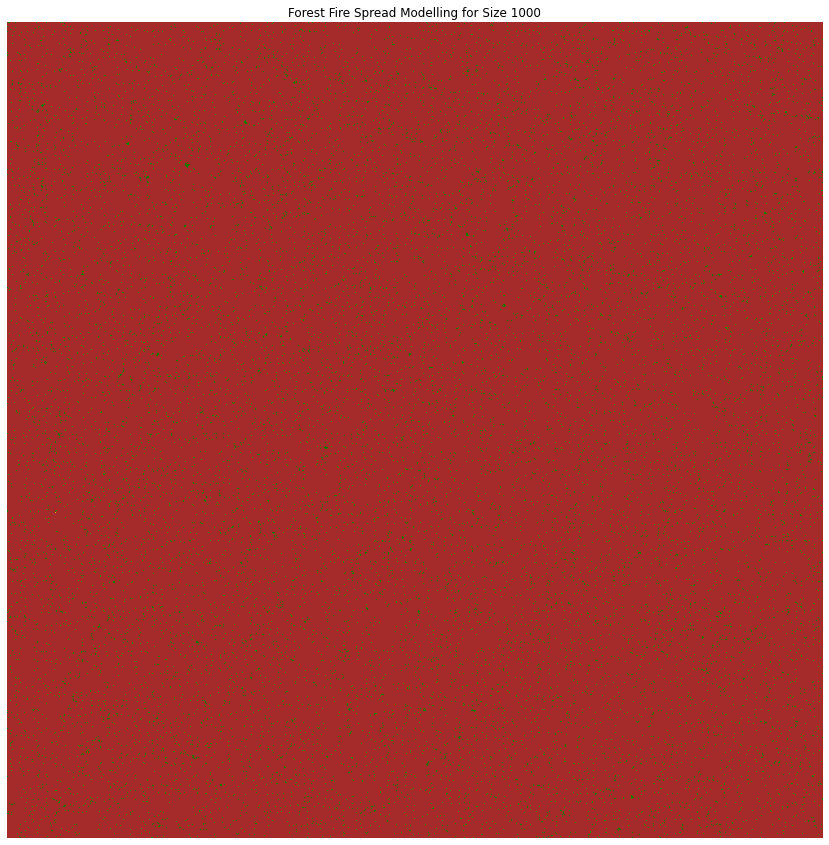

In [9]:
# meausing time for one complete itereation, involving forest initialization, 
# extension of boundaries and spread of fire 
TimeAtStart = time.time()

# generate the initial forest grid
site_size = 1000
forestGrid = InitForest(site_size, site_size)
extendedSite = ExtendSiteBoundary(forestGrid)
extendedSite = SpreadTheFireUsingMoore(extendedSite, site_size, site_size)
tempForest = extendedSite[1:site_size + 1, 1:site_size + 1]

timeElapsed = time.time() - TimeAtStart
print("Time elapsed: ", timeElapsed)

# initialize the plot for the forest
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
ax.set_axis_off()
forestSite = ax.imshow(forestGrid, cmap=colors.ListedColormap(['brown', 'green', 'red', 'orange']))
ax.set_title('Forest Fire Spread Modelling for Size {0}'.format(site_size))

# The animation function produces new frames after each itereation.
def animate(i):
    forestSite.set_array(animate.SiteGrid)
    
    # extend the boundaries of the forest
    extendedSite = ExtendSiteBoundary(animate.SiteGrid)
    
    # apply the fire spread rules
    extendedSite = SpreadTheFireUsingMoore(extendedSite, site_size, site_size)
    
    # remove the temporary cells at the border
    animate.SiteGrid = extendedSite[1:site_size + 1, 1:site_size + 1]
    
# adding the forest grid to the animate function namespace.
animate.SiteGrid = forestGrid

# display the forest fire images
anim = animation.FuncAnimation(fig, animate, interval=200, frames=50)
anim.save('{0}_site.gif'.format(site_size))

plt.show()

Time elapsed:  8.429094552993774


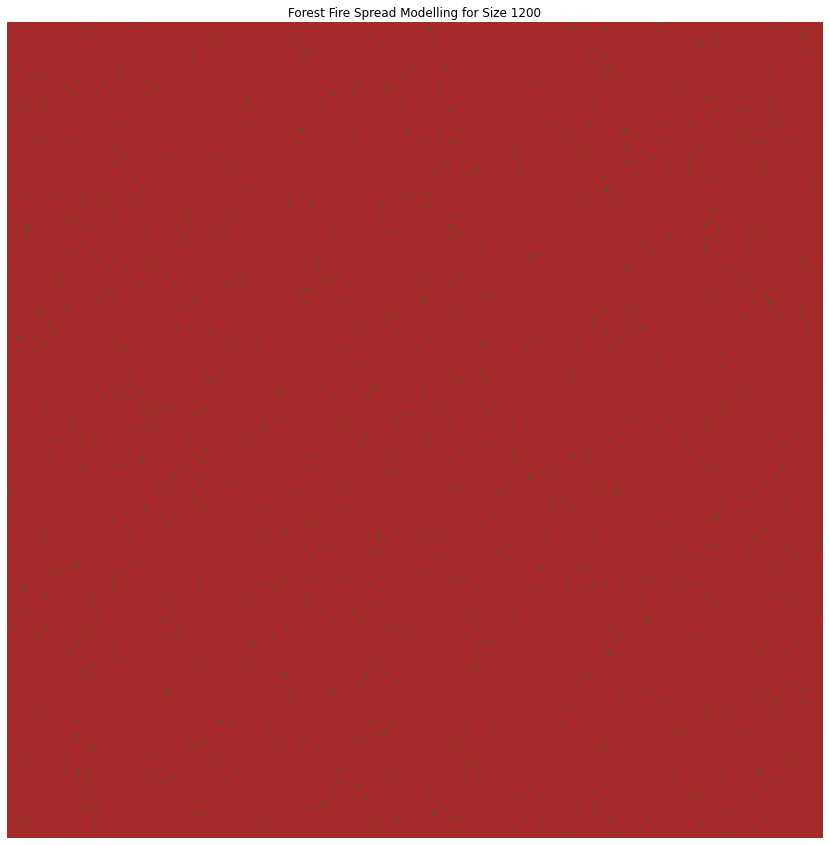

In [10]:
# meausing time for one complete itereation, involving forest initialization, 
# extension of boundaries and spread of fire 
TimeAtStart = time.time()

# generate the initial forest grid
site_size = 1200
forestGrid = InitForest(site_size, site_size)
extendedSite = ExtendSiteBoundary(forestGrid)
extendedSite = SpreadTheFireUsingMoore(extendedSite, site_size, site_size)
tempForest = extendedSite[1:site_size + 1, 1:site_size + 1]

timeElapsed = time.time() - TimeAtStart
print("Time elapsed: ", timeElapsed)

# initialize the plot for the forest
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
ax.set_axis_off()
forestSite = ax.imshow(forestGrid, cmap=colors.ListedColormap(['brown', 'green', 'red', 'orange']))
ax.set_title('Forest Fire Spread Modelling for Size {0}'.format(site_size))

# The animation function produces new frames after each itereation.
def animate(i):
    forestSite.set_array(animate.SiteGrid)
    
    # extend the boundaries of the forest
    extendedSite = ExtendSiteBoundary(animate.SiteGrid)
    
    # apply the fire spread rules
    extendedSite = SpreadTheFireUsingMoore(extendedSite, site_size, site_size)
    
    # remove the temporary cells at the border
    animate.SiteGrid = extendedSite[1:site_size + 1, 1:site_size + 1]
    
# adding the forest grid to the animate function namespace.
animate.SiteGrid = forestGrid

# display the forest fire images
anim = animation.FuncAnimation(fig, animate, interval=50, frames=50)
anim.save('{0}_site.gif'.format(site_size))

plt.show()

Time elapsed:  26.508724451065063


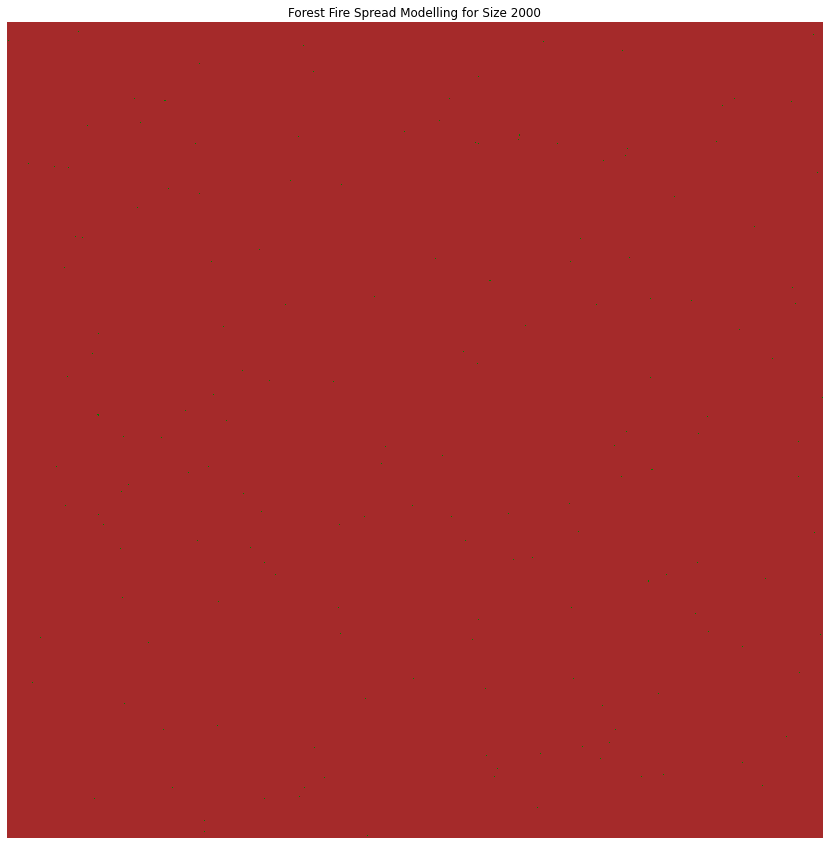

In [11]:
# meausing time for one complete itereation, involving forest initialization, 
# extension of boundaries and spread of fire 
TimeAtStart = time.time()

# generate the initial forest grid
site_size = 2000
forestGrid = InitForest(site_size, site_size)
extendedSite = ExtendSiteBoundary(forestGrid)
extendedSite = SpreadTheFireUsingMoore(extendedSite, site_size, site_size)
tempForest = extendedSite[1:site_size + 1, 1:site_size + 1]

timeElapsed = time.time() - TimeAtStart
print("Time elapsed: ", timeElapsed)

# initialize the plot for the forest
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
ax.set_axis_off()
forestSite = ax.imshow(forestGrid, cmap=colors.ListedColormap(['brown', 'green', 'red', 'orange']))
ax.set_title('Forest Fire Spread Modelling for Size {0}'.format(site_size))

# The animation function produces new frames after each itereation.
def animate(i):
    forestSite.set_array(animate.SiteGrid)
    
    # extend the boundaries of the forest
    extendedSite = ExtendSiteBoundary(animate.SiteGrid)
    
    # apply the fire spread rules
    extendedSite = SpreadTheFireUsingMoore(extendedSite, site_size, site_size)
    
    # remove the temporary cells at the border
    animate.SiteGrid = extendedSite[1:site_size + 1, 1:site_size + 1]
    
# adding the forest grid to the animate function namespace.
animate.SiteGrid = forestGrid

# display the forest fire images
anim = animation.FuncAnimation(fig, animate, interval=200, frames=50)
anim.save('{0}_site.gif'.format(site_size))

plt.show()

Parallelizing the Modelling of the Spread of Forest Fires

In [12]:
jit(nopython=True, parallel=True)
def Parallelized_InitForest(rows, cols):
    # initializing the forest with trees, fire, boundary and empty ground,
    
    forest = np.zeros((rows, cols))
    
    for i in prange(rows):
        for j in prange(cols):
            
            # randomly choosing whether there is a tree or not
            # if the random number is less than the probability of a tree, then there is a tree
            if random() < probTree:
                # if the random number is less than the probability the tree is burning then there is a burning tree
                if random() < probBurning:
                    forest[i][j] = BURNING_TREE
                else:
                    forest[i][j] = NORMAL_TREE
            # else it just an empty ground
            else:
                forest[i][j] = EMPTY_GROUND
                
    return forest

In [13]:
jit(nopython=True, parallel=True)
def Parallelized_ExtendSiteBoundary(forest):
    # using periodic boundary conditions
    # extend the site boundary by add one temporary rows to the top and buttom boundaries.
    # and 2 columns to the left and right boundaries
    
    # adding the top boundary to the buttom boundary and vice versa
    RowStack = np.row_stack((forest[-1,:], forest, forest[0,:]))
    
    # adding the left boundary to the right boundary and the right boundary to the left boundary    
    ColumnStack = np.column_stack((RowStack[:,-1], RowStack, RowStack[:,0]))    
    
    # return the expanded forest
    return ColumnStack

In [14]:
jit(nopython=True, parallel=True)
# converting the von Neumann neighborhood into Moore neighborhood as specified in the assignment
def Parallelized_SpreadTheFireUsingMoore(forest, rows, cols):
    # spreading the fire in the forest
    for i in prange(1, rows + 1):
        for j in prange(1, cols + 1):
            if forest[i][j] == EMPTY_GROUND:
                # if the area is empty ground, then there would be no fire
                forest[i][j] = EMPTY_GROUND
                
            # if there is a tree in the area, fire can spread to the area
            elif forest[i][j] == NORMAL_TREE:             
                    
                # if a neighbouring area is burning, then the tree burns, we'll check the 8 neighbouring areas
                # north, south, east, west, north-east, north-west, south-east, south-west
                if (forest[i - 1][j] == BURNING_TREE or forest[i + 1][j] == BURNING_TREE or 
                    forest[i][j - 1] == BURNING_TREE or forest[i][j + 1] == BURNING_TREE or 
                    forest[i - 1][j - 1] == BURNING_TREE or forest[i - 1][j + 1] == BURNING_TREE or 
                    forest[i + 1][j - 1] == BURNING_TREE or forest[i + 1][j + 1] == BURNING_TREE):
                    
                    # the tree will not burn it's immune to fire
                    if random() < probImmune:
                        forest[i][j] = NORMAL_TREE
                    # otherwise the it will burn
                    else:
                        forest[i][j] = BURNING_TREE
                    
                # if lightning strikes, then the tree burns
                elif random() < probLightning:
                    # the tree will not burn it's immune to fire
                    if random() < probImmune:
                        forest[i][j] = NORMAL_TREE
                    # otherwise the it will burn
                    else:
                        forest[i][j] = BURNING_TREE
                    
                # otherwise, the tree remains a normal tree
                else:
                    forest[i][j] = NORMAL_TREE
            
            # if it's a burning tree, then the tree burns to the ground
            elif forest[i][j] == BURNING_TREE:
                forest[i][j] = EMPTY_GROUND
            else:
                forest[i][j] = EMPTY_GROUND
                    
    return forest

In [15]:
# compile the parallelized methods with an intial run
forestGrid = Parallelized_InitForest(site_size, site_size)
extendedSite = Parallelized_ExtendSiteBoundary(forestGrid)
extendedSite = Parallelized_SpreadTheFireUsingMoore(extendedSite, site_size, site_size)

In [16]:
# meausing time for one complete itereation, involving forest initialization, 
# extension of boundaries and spread of fire 
TimeAtStart = time.time()

# generate the initial forest grid
site_size = 100
forestGrid = Parallelized_InitForest(site_size, site_size)
extendedSite = Parallelized_ExtendSiteBoundary(forestGrid)
extendedSite = Parallelized_SpreadTheFireUsingMoore(extendedSite, site_size, site_size)

# remove the temporary borders
tempForest = extendedSite[1:site_size + 1, 1:site_size + 1]

timeElapsed = time.time() - TimeAtStart
print("Time elapsed for parallel with grid size {0}: ".format(site_size), timeElapsed)

Time elapsed for parallel with grid size 100:  0.07812690734863281


In [17]:
# meausing time for one complete itereation, involving forest initialization, 
# extension of boundaries and spread of fire 
TimeAtStart = time.time()

# generate the initial forest grid
site_size = 400
forestGrid = Parallelized_InitForest(site_size, site_size)
extendedSite = Parallelized_ExtendSiteBoundary(forestGrid)
extendedSite = Parallelized_SpreadTheFireUsingMoore(extendedSite, site_size, site_size)

# remove the temporary borders
tempForest = extendedSite[1:site_size + 1, 1:site_size + 1]

timeElapsed = time.time() - TimeAtStart
print("Time elapsed for parallel with grid size {0}: ".format(site_size), timeElapsed)

Time elapsed for parallel with grid size 400:  0.9746956825256348


In [18]:
# meausing time for one complete itereation, involving forest initialization, 
# extension of boundaries and spread of fire 
TimeAtStart = time.time()

# generate the initial forest grid
site_size = 800
forestGrid = Parallelized_InitForest(site_size, site_size)
extendedSite = Parallelized_ExtendSiteBoundary(forestGrid)
extendedSite = Parallelized_SpreadTheFireUsingMoore(extendedSite, site_size, site_size)
tempForest = extendedSite[1:site_size + 1, 1:site_size + 1]

timeElapsed = time.time() - TimeAtStart
print("Time elapsed for parallel with grid size {0}: ".format(site_size), timeElapsed)

Time elapsed for parallel with grid size 800:  3.85075044631958


In [19]:
# meausing time for one complete itereation, involving forest initialization, 
# extension of boundaries and spread of fire 
TimeAtStart = time.time()

# generate the initial forest grid
site_size = 1000
forestGrid = Parallelized_InitForest(site_size, site_size)
extendedSite = Parallelized_ExtendSiteBoundary(forestGrid)
extendedSite = Parallelized_SpreadTheFireUsingMoore(extendedSite, site_size, site_size)
tempForest = extendedSite[1:site_size + 1, 1:site_size + 1]

timeElapsed = time.time() - TimeAtStart
print("Time elapsed for parallel with grid size {0}: ".format(site_size), timeElapsed)

Time elapsed for parallel with grid size 1000:  5.935617923736572


In [20]:
# meausing time for one complete itereation, involving forest initialization, 
# extension of boundaries and spread of fire 
TimeAtStart = time.time()

# generate the initial forest grid
site_size = 1200
forestGrid = Parallelized_InitForest(site_size, site_size)
extendedSite = Parallelized_ExtendSiteBoundary(forestGrid)
extendedSite = Parallelized_SpreadTheFireUsingMoore(extendedSite, site_size, site_size)
tempForest = extendedSite[1:site_size + 1, 1:site_size + 1]

timeElapsed = time.time() - TimeAtStart
print("Time elapsed for parallel with grid size {0}: ".format(site_size), timeElapsed)

Time elapsed for parallel with grid size 1200:  9.833452463150024


In [21]:
# meausing time for one complete itereation, involving forest initialization, 
# extension of boundaries and spread of fire 
TimeAtStart = time.time()

# generate the initial forest grid
site_size = 2000
forestGrid = Parallelized_InitForest(site_size, site_size)
extendedSite = Parallelized_ExtendSiteBoundary(forestGrid)
extendedSite = Parallelized_SpreadTheFireUsingMoore(extendedSite, site_size, site_size)
tempForest = extendedSite[1:site_size + 1, 1:site_size + 1]

timeElapsed = time.time() - TimeAtStart
print("Time elapsed for parallel with grid size {0}: ".format(site_size), timeElapsed)

Time elapsed for parallel with grid size 2000:  24.665811777114868
